

# Mathematics for ML Assignment

P Varun - B210689EC

Joshua Mani Vinod - B210616EC

N Yoshith Sai - B211291EC

M Veera Abhinanda - B210708EC

Turicreate is a machine learning library developed by Apple that simplifies the process of building and deploying machine learning models. It provides a user-friendly interface for tasks like data preprocessing, model creation, and evaluation. Turicreate supports various machine learning tasks, including regression, classification, clustering, and recommender systems. It is designed to be accessible to users with varying levels of expertise in machine learning, making it a versatile choice for both beginners and experienced practitioners.

matplotlib.pyplot is a plotting library in Python that provides a wide variety of functions for creating static, animated, and interactive visualizations. It is part of the Matplotlib library and is commonly used for creating 2D plots and charts. With pyplot, you can generate line plots, scatter plots, bar plots, histograms, and more. It is highly customizable, allowing users to control various aspects of the plot such as colors, labels, and axes. pyplot is widely used in the scientific and data analysis communities for visualizing data and conveying insights through graphical representations.

Pandas is a powerful open-source data manipulation and analysis library for Python. It provides data structures like DataFrames, which are essentially two-dimensional tables with rows and columns. Pandas excels at handling and cleaning structured data, making tasks such as data filtering, aggregation, and transformation more efficient. It integrates seamlessly with other libraries, making it a fundamental tool in the data science and analytics ecosystem. Pandas simplifies tasks such as reading and writing data in various formats (CSV, Excel, SQL databases), handling missing data, and performing statistical operations on datasets.

Seaborn is a statistical data visualization library built on top of Matplotlib in Python. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn simplifies the process of creating complex visualizations by providing functions that automatically handle the styling and aesthetics of plots. It is particularly useful for visualizing relationships in data, such as scatter plots, pair plots, and heatmaps. Seaborn also integrates well with Pandas DataFrames, making it a popular choice for data analysts and scientists for exploring and presenting data in a visually appealing way.

In [1]:
import turicreate as tc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

## Load the data

In [2]:
data = tc.SFrame.read_csv('Placement_Data_Full_Class.csv')

Finished parsing file /home/varun/Kaggle/MML assignment/Placement_Data_Full_Class.csv

Parsing completed. Parsed 100 lines in 0.018201 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,str,float,str,str,float,str,str,float,str,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/varun/Kaggle/MML assignment/Placement_Data_Full_Class.csv

Parsing completed. Parsed 215 lines in 0.009596 secs.

## Exploring the data

In [3]:
data

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation
1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin
3,M,65.0,Central,68.0,Central,Arts,64.0,Comm&Mgmt,No,75.0,Mkt&Fin
4,M,56.0,Central,52.0,Central,Science,52.0,Sci&Tech,No,66.0,Mkt&HR
5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin
6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin
7,F,46.0,Others,49.2,Others,Commerce,79.0,Comm&Mgmt,No,74.28,Mkt&Fin
8,M,82.0,Central,64.0,Central,Science,66.0,Sci&Tech,Yes,67.0,Mkt&Fin
9,M,73.0,Central,79.0,Central,Commerce,72.0,Comm&Mgmt,No,91.34,Mkt&Fin
10,M,58.0,Central,70.0,Central,Commerce,61.0,Comm&Mgmt,No,54.0,Mkt&Fin


In [4]:
#replacing string type data with int for convenience
data['status']=[data['status']=='Placed'][0]

Removing columns which won't be of any use in prediction

In [5]:
data.remove_column('salary')

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation
1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin
3,M,65.0,Central,68.0,Central,Arts,64.0,Comm&Mgmt,No,75.0,Mkt&Fin
4,M,56.0,Central,52.0,Central,Science,52.0,Sci&Tech,No,66.0,Mkt&HR
5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin
6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin
7,F,46.0,Others,49.2,Others,Commerce,79.0,Comm&Mgmt,No,74.28,Mkt&Fin
8,M,82.0,Central,64.0,Central,Science,66.0,Sci&Tech,Yes,67.0,Mkt&Fin
9,M,73.0,Central,79.0,Central,Commerce,72.0,Comm&Mgmt,No,91.34,Mkt&Fin
10,M,58.0,Central,70.0,Central,Commerce,61.0,Comm&Mgmt,No,54.0,Mkt&Fin


In [6]:
data.show()

Materializing SFrame

In [7]:
all_features=data.column_names()
all_features.remove('sl_no')
all_features.remove('status')
all_features.remove('salary')
all_features

['gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'hsc_s',
 'degree_p',
 'degree_t',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p']

## Splitting the data

In [8]:
train_data, test_data = data.random_split(0.8, seed=42)

## Using different models

#### Boosted tree classifier

In [9]:
boosted_tree_model=tc.boosted_trees_classifier.create(train_data, target='status', features=all_features, validation_set=test_data)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 170

Number of classes           : 2

Number of feature columns   : 12

Number of unpacked features : 12

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.042302     | 0.964706          | 0.844444            | 0.504943          | 0.556265            |

| 2         | 0.079954     | 0.970588          | 0.888889            | 0.394857          | 0.476526            |

| 3         | 0.116216     | 0.982353          | 0.888889            | 0.313149          | 0.414394            |

| 4         | 0.142052     | 0.976471          | 0.911111            | 0.262036          | 0.382235            |

| 5         | 0.172281     | 0.988235          | 0.933333            | 0.218184          | 0.360962            |

| 10        | 0.297510     | 1.000000          | 0.888889            | 0.101504          | 0.265833            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [10]:
boosted_tree_model.evaluate(test_data)

{'accuracy': 0.8888888888888888,
 'auc': 0.9387019230769231,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |   9   |
 |      1       |        1        |   31  |
 |      0       |        1        |   4   |
 |      1       |        0        |   1   |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9253731343283582,
 'log_loss': 0.26583304500484056,
 'precision': 0.8857142857142857,
 'recall': 0.96875,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+----+----+
 | threshold | fpr | tpr | p  | n  |
 +-----------+-----+-----+----+----+
 |    0.0    | 1.0 | 1.0 | 32 | 13 |
 |   0.001   | 1.0 | 1.0 | 32 | 13 |
 |   0.002   | 1.0 | 1.0 | 32 | 13 |
 |   0.003   |

#### Decision tree classifier

In [11]:
decision_tree_model=tc.decision_tree_classifier.create(train_data, target='status', features=all_features, validation_set=test_data)

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 170

Number of classes           : 2

Number of feature columns   : 12

Number of unpacked features : 12

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.082448     | 0.964706          | 0.844444            | 0.249272          | 0.415189            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [12]:
decision_tree_model.evaluate(test_data)

{'accuracy': 0.8888888888888888,
 'auc': 0.7776442307692307,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |   8   |
 |      1       |        1        |   32  |
 |      0       |        1        |   5   |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.927536231884058,
 'log_loss': 0.41518920062837916,
 'precision': 0.8648648648648649,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+----+----+
 | threshold | fpr | tpr | p  | n  |
 +-----------+-----+-----+----+----+
 |    0.0    | 1.0 | 1.0 | 32 | 13 |
 |   0.001   | 1.0 | 1.0 | 32 | 13 |
 |   0.002   | 1.0 | 1.0 | 32 | 13 |
 |   0.003   | 1.0 | 1.0 | 32 | 13 |
 |   0.004   | 1.0 | 1.0 |

#### Logistic classifier

In [13]:
logistic_model=tc.logistic_classifier.create(train_data, target='status', features=all_features, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 170

Number of classes           : 2

Number of feature columns   : 12

Number of unpacked features : 12

Number of coefficients      : 15

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.001567     | 0.894118          | 0.911111            |

| 2         | 3        | 0.003755     | 0.894118          | 0.888889            |

| 3         | 4        | 0.007582     | 0.888235          | 0.888889            |

| 4         | 5        | 0.009471     | 0.882353          | 0.888889            |

| 5         | 6        | 0.011054     | 0.882353          | 0.888889            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [14]:
logistic_model.evaluate(test_data)

{'accuracy': 0.8888888888888888,
 'auc': 0.9471153846153845,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |   3   |
 |      0       |        0        |   11  |
 |      1       |        1        |   29  |
 |      0       |        1        |   2   |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9206349206349206,
 'log_loss': 0.2651382892836944,
 'precision': 0.9354838709677419,
 'recall': 0.90625,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+----+----+
 | threshold |        fpr         | tpr | p  | n  |
 +-----------+--------------------+-----+----+----+
 |    0.0    |        1.0         | 1.0 | 32 | 13 |
 |   0.001   | 0.923076923076

#### Nearest neighbour classifier

In [15]:
nn_model=tc.nearest_neighbor_classifier.create(train_data, target='status', features=all_features)

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [16]:
nn_model.evaluate(test_data)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 45      | 0.588235    | 54.189ms     |

| Done         |         | 100         | 96.198ms     |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 45      | 0.588235    | 69.58ms      |

| Done         |         | 100         | 93.826ms     |

+--------------+---------+-------------+--------------+

{'accuracy': 0.9111111111111111,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        1        |   32  |
 |      0       |        1        |   4   |
 |      0       |        0        |   9   |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+----+----+
 | threshold | fpr | tpr | p  | n  |
 +-----------+-----+-----+----+----+
 |    0.0    | 1.0 | 1.0 | 32 | 13 |
 |   0.001   | 1.0 | 1.0 | 32 | 13 |
 |   0.002   | 1.0 | 1.0 | 32 | 13 |
 |   0.003   | 1.0 | 1.0 | 32 | 13 |
 |   0.004   | 1.0 | 1.0 | 32 | 13 |
 |   0.005   | 1.0 | 1.0 | 32 | 13 |
 |   0.006   | 1.0 | 1.0 | 32 | 13 |
 |   0.007   | 1.0 | 1.0 | 32 | 13 |
 |   0.008   | 1.0 | 1

#### Random forest classifier

In [17]:
random_forest_model=tc.random_forest_classifier.create(train_data, target='status', features=all_features, validation_set=test_data)

Random forest classifier:

--------------------------------------------------------

Number of examples          : 170

Number of classes           : 2

Number of feature columns   : 12

Number of unpacked features : 12

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.034087     | 0.911765          | 0.777778            | 0.348174          | 0.508492            |

| 2         | 0.068680     | 0.917647          | 0.755556            | 0.296274          | 0.449521            |

| 3         | 0.110572     | 0.941176          | 0.822222            | 0.288402          | 0.436670            |

| 4         | 0.152894     | 0.964706          | 0.777778            | 0.289288          | 0.443373            |

| 5         | 0.190717     | 0.935294          | 0.822222            | 0.293799          | 0.423092            |

| 10        | 0.361271     | 0.952941          | 0.888889            | 0.286481          | 0.395806            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [18]:
random_forest_model.evaluate(test_data)

{'accuracy': 0.8888888888888888,
 'auc': 0.8798076923076924,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |   9   |
 |      1       |        1        |   31  |
 |      0       |        1        |   4   |
 |      1       |        0        |   1   |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9253731343283582,
 'log_loss': 0.39580609084437623,
 'precision': 0.8857142857142857,
 'recall': 0.96875,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+----+----+
 | threshold | fpr | tpr | p  | n  |
 +-----------+-----+-----+----+----+
 |    0.0    | 1.0 | 1.0 | 32 | 13 |
 |   0.001   | 1.0 | 1.0 | 32 | 13 |
 |   0.002   | 1.0 | 1.0 | 32 | 13 |
 |   0.003   |

In [19]:
performance_summary = pd.DataFrame({
    'Model':['BT','DT','LC','NN','RF'],
    'ACC':[boosted_tree_model.validation_precision, decision_tree_model.validation_precision, logistic_model.validation_precision,0.9111111111111111, random_forest_model.validation_precision]
})

In [20]:
performance_summary

,Model,ACC
0,BT,0.885714
1,DT,0.864865
2,LC,0.935484
3,NN,0.911111
4,RF,0.885714


<AxesSubplot:xlabel='Model', ylabel='ACC'>

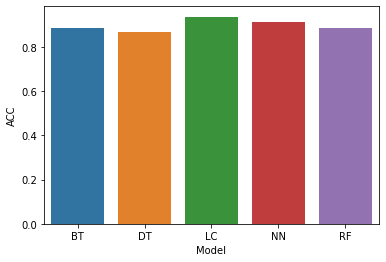

In [21]:
sns.barplot(data = performance_summary,x = 'Model',y = 'ACC')